### Алгоритм Грэхема ### 
— алгоритм построения выпуклой оболочки в двумерном пространстве. В этом алгоритме задача о выпуклой оболочке решается с помощью стека, сформированного из точек-кандидатов. Все точки входного множества заносятся в стек, а потом точки, не являющиеся вершинами выпуклой оболочки, со временем удаляются из него. По завершении работы алгоритма в стеке остаются только вершины оболочки в порядке их обхода против часовой стрелки.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_Q_S(Q_copy, S):
    S.append(S[0]) #замыкаем множество S

    fig = plt.figure()

    X, Y = [], []
    for p in Q_copy: 
        X.append(p[0])
        Y.append(p[1])

    plt.plot(X,Y,'go')
    fig.show()

    X, Y = [], []  
    for s in S:
        X.append(s[0])
        Y.append(s[1])


    plt.plot(X,Y)
    fig.show()


[(-463, 381), (415, 137), (136, -351), (-317, -63), (-313, 73), (-373, -343), (419, 172), (-431, 52), (-420, 323), (-236, -49), (117, -359), (-127, 17), (-410, -324), (176, -233), (170, -180), (-247, 121), (240, 268), (-486, -22), (21, -273), (-46, -105), (365, -250), (-159, 56), (-86, 418), (-42, -9), (194, -161), (-259, 236), (214, -203), (243, -363), (415, -499), (-497, 328), (-208, -259), (-162, -82), (-349, -88), (-459, -431), (197, 33), (375, 115), (-393, -125), (164, 287), (81, 178), (-44, 281), (121, -308), (-50, -212), (391, -442), (-128, -192), (-14, 264), (-237, 170), (-231, -39), (165, 489), (340, 272), (-213, 475), (349, -345), (236, -105), (396, -127), (-55, -166), (270, 465), (92, 63), (-245, 114), (-101, 423), (40, 144), (294, 323), (-354, -65), (-488, -344), (-350, -451), (-438, 86), (-37, -257), (-248, -164), (133, 159), (227, 199), (188, -425), (-324, -110), (153, -325), (207, 478), (308, 293), (261, -219), (-189, 106), (-311, -161), (-455, 282), (-282, 45), (-162, 2

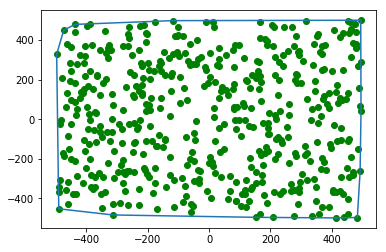

In [5]:


import numpy as np
import math
import copy

def not_left_turn(a,b,c):
    Ux = (b[0] - a[0])
    Vy = (c[1] - b[1])
    Uy = (b[1] - a[1])
    Vx = (c[0] - b[0])
    
    #условие не левого поворота, которое должно выполняться
    if (Ux*Vy - Uy*Vx)<0: 
        return True
    else:
        return False

def cmp(x_, y_):
    
    #перенос системы координат, т.к измеряется полярный угол относительно p0
    x = x_ - p0[0]   
    y = y_ - p0[1]
    
    #вычисление полярного угла
    if x>0 and y>=0:
        return abs(math.atan(y/x))
    if x>0 and y<0:
        return abs(math.atan(y/x) + 2*math.pi)
    if x<0:
        return abs(math.atan(y/x) + math.pi)
    if x==0 and y>0:
        return abs(math.pi/2)
    if x==0 and y<0:
        return abs(3*math.pi/2)

N = 500
Q = []
for i in range(N):
    x = random.randint(-500, 500)
    y = random.randint(-500, 500)
    Q.append((x,y))
    
Q_copy = copy.copy(Q)

p0 = (min(Q, key=lambda x: x[1])) #— точка из множества Q с минимальной координатой y
Q.remove(p0)

Q.sort(key = lambda x: cmp(x[0],x[1])) #остальные точки множества Q, 
                                       #отсортированные в порядке возрастания полярного угла, относительно p0

S = [p0, Q[0]] #типа стэк

Q = Q[1:]      #нужен список без добавленных в S элементов

for p in Q:
    while(not_left_turn(S[-2], S[-1], p)):
        del S[-1]
    S.append(p)
        

plot_Q_S(Q_copy, S)
print(S)